<a href="https://colab.research.google.com/github/bray2020/AI-works/blob/main/FFNN%2C_CNN_model_building_using_Fashion_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FFNN, CNN Model building with Fashion mnist dataset

### Import necessary librarries:

In [ ]:
import tensorflow as tf
import numpy as np
from   tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data:

In [ ]:
data = tf.keras.datasets.fashion_mnist
(trainX, trainY) , (testX, testY) = data.load_data()

In [ ]:
#check the shape and dimensions:
print(trainX.shape)
print(testX.shape)
print(trainX.ndim)
print(testX.ndim)

(60000, 28, 28)
(10000, 28, 28)
3
3


In [ ]:
#check the output data:
print(trainY[3])

3


### Visualize the data in train and test set:

In [ ]:
#Display the pixel values of the 10th record or image of the train set:
np.set_printoptions(linewidth=200)
trainX[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,   0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187, 149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221, 197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187, 190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168, 173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,   0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180, 184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,   0,   0],
       [  0,   0,   0,   0,  35, 177, 155, 140, 151, 172, 191, 187, 186, 187, 186, 187, 182, 191, 194, 188

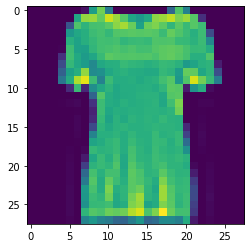

In [ ]:
#Display the 10th image:
plt.imshow(trainX[10])

In [ ]:
#Let's check the output label of the 10th image:
trainY[10]

0

- So, the 10th image is classified as label '0' 

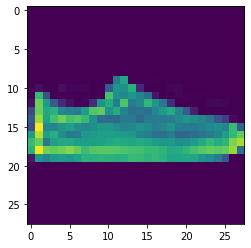

In [ ]:
#Now Display the 12th image of the test set:
plt.imshow(testX[12])

In [ ]:
#let's check the output label of the 12th image:
testY[12]

7

- So, the 12th image of the test set looks like an image of show and it is classified as label '7'

Converting the traget into multiple labels:
- Will apply one-hot encoding on the target variable
- It will help in locating the digit in an array , as our result will be an array of possibilities

In [ ]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [ ]:
#check the output data now:
print(trainY[8])
print(testY[65]) 

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


### Model building:

In [ ]:
#To remove any deafult MLP/graph, if any present at all
tf.keras.backend.clear_session()                                     

#initialize the sequsential model
model = tf.keras.models.Sequential()                                

#reshape the data from 2D to 1D ->(28X28) to (784,)
model.add(tf.keras.layers.Reshape((784,), input_shape=(28,28,)))

#applying min-max normalization on the input data (train and test both)
trainX, testX = trainX/255.0, testX/255.0                           

#added 3 hidden layers
model.add(tf.keras.layers.Dense(128, activation='relu'))        #add 1st hidden layer with 128 neurons, activation 'relu'
model.add(tf.keras.layers.Dense(128, activation='relu'))        #add 2nd hidden layer with 128 neurons, activation 'relu'
model.add(tf.keras.layers.Dense(128, activation='relu'))        #add 3rd hidden layer with 128 neurons, activation 'relu'
model.add(tf.keras.layers.Dense(128, activation='relu'))        #add 4th hidden layer with 128 neurons, activation 'relu'
model.add(tf.keras.layers.Dense(256, activation='relu'))        #add 5th hidden layer with 256 neurons, activation 'relu' 
model.add(tf.keras.layers.Dense(10, activation='softmax'))      #output layer for 10 target labels, activation softmax used for multi-label classification

In [ ]:
#display the model summary, trainable parameters etc:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2

**Explanation on number of trainable/non-trainable parameters:**
- 1st is the Input layer, so no trainable parameters present here
- 1st hidden layer calculation: 784x128+128 = 100480
- 2nd hidden layer calculation: 128x128+128 = 16512
- 3rd hidden layer calculation: 128x128+128 = 16512
- 4th hidden layer calculation: 128x128+128 = 16512
- 5th hidden layer calculation: 128x256+256 = 33024
- final output layer calculation: 256x10+10 = 2570
- Total traiable parameters, (100480+ 16512+ 16512+ 16512+ 33024+ 2570) = 185,610
- There is no non-trainable parameters present

### Compile and train the Model:

In [ ]:
#SGD is used.  as the optimizer here with learning rate 0.03
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.03)  
#Optimizer = 'adam'

#loss function used is 'categorical_crossentropy', as the target variable is represented in one-hot encoded manner. 
#For this classification problem accuracy has been used as the evaluation metric 
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])  

- Using callbacks to control training : We want to stop the training after reaching certain accuracy value, 90% here.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.90):
      print('\nReached 97% Validation Accuracy, so cancelling model training')
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
#train the model and save the model run history: 
#validation set taken as 10%
#no of epochs = 30
#Instead of giving the enitire data we are considering small batches of 32 data points. So, there will be total 60000/32 or 1875 iterations in eack epoch.
history = model.fit(trainX, trainY, validation_split=0.1, epochs=100, batch_size=32, callbacks=[callbacks])

Epoch 1/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6827 - accuracy: 0.7545 - val_loss: 0.5163 - val_accuracy: 0.8168
Epoch 2/100
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4306 - accuracy: 0.8436 - val_loss: 0.5289 - val_accuracy: 0.7833
Epoch 3/100
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3801 - accuracy: 0.8600 - val_loss: 0.4067 - val_accuracy: 0.8543
Epoch 4/100
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3515 - accuracy: 0.8704 - val_loss: 0.3562 - val_accuracy: 0.8670
Epoch 5/100
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3297 - accuracy: 0.8785 - val_loss: 0.3716 - val_accuracy: 0.8610
Epoch 6/100
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3124 - accuracy: 0.8837 - val_loss: 0.3367 - val_accuracy: 0.8778
Epoch 7/100
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2999 - accuracy: 0.8884 - val_loss: 0.3538 - val_ac

### Displaying the model run history as a dataframe

In [ ]:
#Display the training loss and validation loss at every epoch. 
#Display the same as a data frame of history
import pandas as pd
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head(10)

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.682699,0.754519,0.516277,0.816833,0
1,0.430595,0.843574,0.528871,0.783333,1
2,0.380136,0.860037,0.406675,0.854333,2
3,0.351493,0.870352,0.356247,0.867000,3
4,0.329681,0.878482,0.371643,0.861000,4
5,0.312413,0.883667,0.336702,0.877833,5
6,0.299867,0.888407,0.353770,0.872000,6
7,0.289198,0.891741,0.341918,0.872500,7
8,0.276382,0.896815,0.323214,0.884500,8
9,0.267819,0.899241,0.344823,0.871167,9


### Model overfitting check:

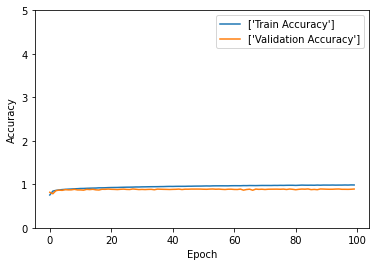

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'], label=['Train Accuracy'])
  plt.plot(hist['epoch'], hist['val_accuracy'], label=['Validation Accuracy'])
  plt.ylim([0,5])
  plt.legend()
  plt.show()

plot_history(history)

- It seems there is almost no overfitting. 

- Check the highest validation accuracy obtained by the model:

In [ ]:
round(hist['val_accuracy'].max(), 4)

0.8938

### It seems that the FFNN model built is not able to achieve the traget accuracy, Will buid CNN model now using the same data

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels) , (test_images, test_labels) = mnist.load_data()

In [ ]:
print('no of axes in train image', train_images.ndim)
print('no of axes in test image', test_images.ndim)
print('shape of train image', train_images.shape)
print('shape of test image', test_images.shape)

no of axes in train image 3
no of axes in test image 3
shape of train image (60000, 28, 28)
shape of test image (10000, 28, 28)


- Resahpe the data for CNN Model vuidling:

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

#After reshaping:
print('no of axes in train image', train_images.ndim)
print('no of axes in test image', test_images.ndim)
print('shape of train image', train_images.shape)
print('shape of test image', test_images.shape)

no of axes in train image 4
no of axes in test image 4
shape of train image (60000, 28, 28, 1)
shape of test image (10000, 28, 28, 1)


- Normalization of the data

In [ ]:
train_images, test_images = train_images/255.0, test_images/255.0

- Create the convolutional base

In [ ]:
model_cnn = keras.models.Sequential()

#1st hidden layer has 32 filters, each filter has 3X3 size. Stride size is 1.  
model_cnn.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))

#Adding Pooling Layer. Pooling is used to down-sample the output of convolution aggressively, also used for avoiding over-fitting in the model
model_cnn.add(keras.layers.MaxPooling2D((2,2)))

#2ND LAYER HAS 64 filters:
model_cnn.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2,2)))

#3RD LAYER HAS 64 filters:
model_cnn.add(keras.layers.Conv2D(64, (3,3), activation='relu'))

#Add dense layers on top of it
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dense(10, activation='softmax'))  #Final output layer, as there are total 10 classes so 10 and softmax

In [ ]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

- Calculation for the conv2d (Conv2D) layer: (3x3+1)x32, so 320
- max_pooling2d layer will have no parameters
- Calculation for the 2nd conv2d layer: (3x3x32+1)64, so 18496
- Calculation for the 3rd conv2d layer: (3x3x64+1)64, so 36928
- Here (3x3x64) outputs are flattened as into vector of shape (576) before going through into 2 Dense layers
- 576x64+64 = 36928
- Final layer : 64x10+64 = 650

### Compile and train the Model:

In [ ]:
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_cnn.fit(train_images, train_labels, validation_split=0.1, epochs=10)

Epoch 1/10
1688/1688 [==============================] - 53s 31ms/step - loss: 0.5080 - accuracy: 0.8145 - val_loss: 0.3482 - val_accuracy: 0.8753
Epoch 2/10
1688/1688 [==============================] - 50s 30ms/step - loss: 0.3237 - accuracy: 0.8832 - val_loss: 0.3162 - val_accuracy: 0.8832
Epoch 3/10
1688/1688 [==============================] - 50s 30ms/step - loss: 0.2775 - accuracy: 0.8991 - val_loss: 0.2774 - val_accuracy: 0.8990
Epoch 4/10
1688/1688 [==============================] - 50s 29ms/step - loss: 0.2455 - accuracy: 0.9096 - val_loss: 0.2967 - val_accuracy: 0.8945
Epoch 5/10
1688/1688 [==============================] - 50s 29ms/step - loss: 0.2246 - accuracy: 0.9167 - val_loss: 0.2511 - val_accuracy: 0.9087
Epoch 6/10
1688/1688 [==============================] - 50s 29ms/step - loss: 0.2043 - accuracy: 0.9246 - val_loss: 0.2646 - val_accuracy: 0.9027
Epoch 7/10
1688/1688 [==============================] - 50s 29ms/step - loss: 0.1838 - accuracy: 0.9318 - val_loss: 0.2494 -

- So, using CNN model(with maxpooling) on the same data shows drust improvment on the validation accuracy(achieved in just 5 epochs).  

### Display the confusion matrix to show misclassifications:

In [ ]:
preds = model_cnn.predict(test_images)

In [ ]:
#Chcek one prediction
import numpy as np
print(np.argmax(preds[17]))

#Chcek the actual value of thgis predicted vlaue:
print(test_labels[17])

4
4


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import itertools

classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

# Predict the values from the validation dataset
Y_pred = model.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1)  

In [ ]:
#Y_pred_classes[:3]

array([9, 2, 1])

#### Confusion matrix:

In [ ]:
# compute the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(test_labels, Y_pred_classes) 
print(confusion_mtx)

[[715   3  16 114   6   2 127   0  17   0]
 [  1 964   1  29   2   0   1   0   2   0]
 [  7   0 732  23 108   1 117   0  12   0]
 [  5   2  11 952  13   0  10   0   7   0]
 [  0   0  68  45 808   1  72   0   6   0]
 [  0   0   0   1   0 957   0  20   5  17]
 [ 99   4  49  71  68   0 691   0  18   0]
 [  0   0   0   0   0  14   0 944   4  38]
 [  2   0   1   2   3   6   4   3 979   0]
 [  0   0   0   0   0  10   1  24   0 965]]


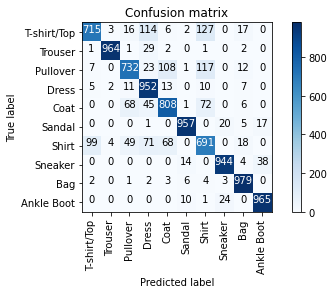

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# compute the confusion matrix
confusion_mtx = confusion_matrix(test_labels, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

**Misclassification Data:**
- For T-Shirts/Tops : Rightly classified 715 data points, rest all misclassified
- For Trouser :  Rightly classified 964 data points, rest all misclassified
- Similarly, for Bag Rightly classified 979 data points, rest all misclassified

#### Classification Report:

In [ ]:
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print(classification_report(test_labels, Y_pred_classes, target_names = classes))

              precision    recall  f1-score   support

 T-shirt/Top       0.86      0.71      0.78      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.83      0.73      0.78      1000
       Dress       0.77      0.95      0.85      1000
        Coat       0.80      0.81      0.80      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.68      0.69      0.68      1000
     Sneaker       0.95      0.94      0.95      1000
         Bag       0.93      0.98      0.96      1000
  Ankle Boot       0.95      0.96      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



- So, as we can see from above report that for 'Bag' the recall is the highest, 98%
- Whereas, for T-Shirts/Top the recall is the lowest among all the classes, 71%